## Import libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:/Users/AANCHAL/OneDrive - vit.ac.in/practice_data/chicago-energy-benchmarking-1.csv")

### Descriptive statistics

In [4]:
data.head()

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location
0,2014,157767,Roosevelt Hi-CPS,3436 W WILSON AVE,60625,ALBANY PARK,K-12 School,319900.0,1927.0,1,...,NaN,80.0,129.0,75.0,122.0,2379.0,7.44,41.965013,-87.714513,"(41.96501325, -87.71451268)"
1,2014,100256,Curie Metrop-CPS,4975 S Archer,60632,ARCHER HEIGHTS,K-12 School,447330.0,1990.0,1,...,NaN,96.0,268.0,93.0,261.0,7573.0,16.93,41.802759,-87.722671,"(41.802759, -87.722671)"
2,2014,101551,METROPOLITIAN PIER AND EXPOSITION AUTHORITY,301 Cermak Road,60616,ARMOUR SQUARE,Convention Center,9245333.0,1971.0,8,...,NaN,90.0,204.0,86.0,200.0,115833.0,12.53,41.852840,-87.634931,"(41.85284, -87.634931)"
3,2014,100396,St. Rita of Cascia High School,7740 South Western Avenue,60620,ASHBURN,K-12 School,250000.0,1960.0,1,...,NaN,84.0,139.0,80.0,135.0,2010.0,8.04,41.752003,-87.684637,"(41.7520028, -87.68463714)"
4,2014,250052,Steinmetz Ac-CPS,3030 N MOBILE AVE,60634,BELMONT CRAGIN,K-12 School,323400.0,1934.0,1,...,NaN,85.0,142.0,80.0,136.0,2664.0,8.24,41.935603,-87.784340,"(41.93560335, -87.7843396)"


In [5]:
data.columns

Index(['Data Year', 'ID', 'Property Name', 'Address', 'ZIP Code',
       'Community Area', 'Primary Property Type',
       'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings',
       'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)',
       'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [6]:
attributes = ['Gross Floor Area - Buildings (sq ft)', 'Electricity Use (kBtu)', '# of Buildings','Weather Normalized Source EUI (kBtu/sq ft)']
df = data[attributes]

In [7]:
df.shape

(4481, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gross Floor Area - Buildings (sq ft)        4481 non-null   float64
 1   Electricity Use (kBtu)                      4455 non-null   float64
 2   # of Buildings                              4481 non-null   int64  
 3   Weather Normalized Source EUI (kBtu/sq ft)  4392 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 140.2 KB


In [9]:
df.isnull().sum()

Gross Floor Area - Buildings (sq ft)           0
Electricity Use (kBtu)                        26
# of Buildings                                 0
Weather Normalized Source EUI (kBtu/sq ft)    89
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gross Floor Area - Buildings (sq ft),4481.0,3.119045e+05,4.958713e+05,44575.0,80000.0,145784.0,344016.0,9245333.0
Electricity Use (kBtu),4455.0,1.512939e+07,3.224181e+07,214.0,2362654.8,5494589.3,13108450.0,495368832.0
# of Buildings,4481.0,1.499219e+00,5.836734e+00,1.0,1.0,1.0,1.0,236.0
Weather Normalized Source EUI (kBtu/sq ft),4392.0,2.026243e+02,2.713703e+02,0.3,124.8,161.4,216.3,8550.4


### Data Cleaning

In [11]:
df['Weather Normalized Source EUI (kBtu/sq ft)'].fillna(df['Weather Normalized Source EUI (kBtu/sq ft)'].mean(), inplace=True)
df['Electricity Use (kBtu)'].fillna(df['Electricity Use (kBtu)'].mean(), inplace=True)

In [12]:
df['Weather Normalized Source EUI (kBtu/sq ft)'].head(11)

0     122.000000
1     261.000000
2     200.000000
3     135.000000
4     136.000000
5     146.000000
6     433.000000
7     222.000000
8     135.000000
9     202.624294
10    111.000000
Name: Weather Normalized Source EUI (kBtu/sq ft), dtype: float64

In [13]:
df.isnull().sum()

Gross Floor Area - Buildings (sq ft)          0
Electricity Use (kBtu)                        0
# of Buildings                                0
Weather Normalized Source EUI (kBtu/sq ft)    0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gross Floor Area - Buildings (sq ft),4481.0,3.119045e+05,4.958713e+05,44575.0,80000.0,145784.0,344016.0,9245333.0
Electricity Use (kBtu),4481.0,1.512939e+07,3.214812e+07,214.0,2368893.3,5526792.0,13343311.8,495368832.0
# of Buildings,4481.0,1.499219e+00,5.836734e+00,1.0,1.0,1.0,1.0,236.0
Weather Normalized Source EUI (kBtu/sq ft),4481.0,2.026243e+02,2.686612e+02,0.3,125.5,163.5,214.9,8550.4


In [15]:
df.nunique()

Gross Floor Area - Buildings (sq ft)          2628
Electricity Use (kBtu)                        4451
# of Buildings                                  30
Weather Normalized Source EUI (kBtu/sq ft)    2238
dtype: int64

## Data visualization

##### Histogram

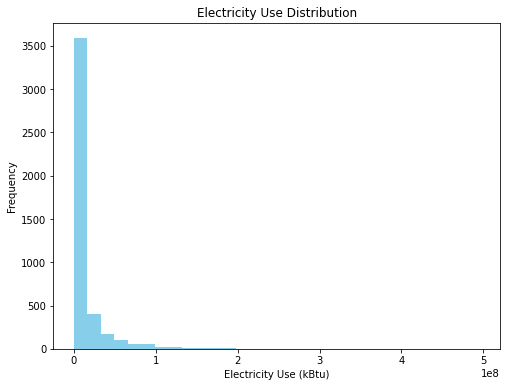

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['Electricity Use (kBtu)'], bins=30, color='skyblue')
plt.title("Electricity Use Distribution")
plt.xlabel("Electricity Use (kBtu)")
plt.ylabel("Frequency")
plt.show()

#### Scatter plot

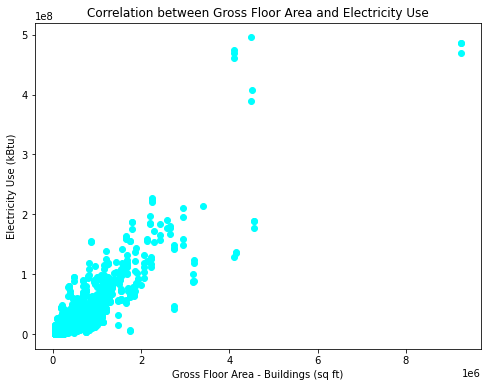

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Gross Floor Area - Buildings (sq ft)'], df['Electricity Use (kBtu)'], color='cyan')
plt.title("Correlation between Gross Floor Area and Electricity Use")
plt.xlabel("Gross Floor Area - Buildings (sq ft)")
plt.ylabel("Electricity Use (kBtu)")
plt.show()

#### Pair plot

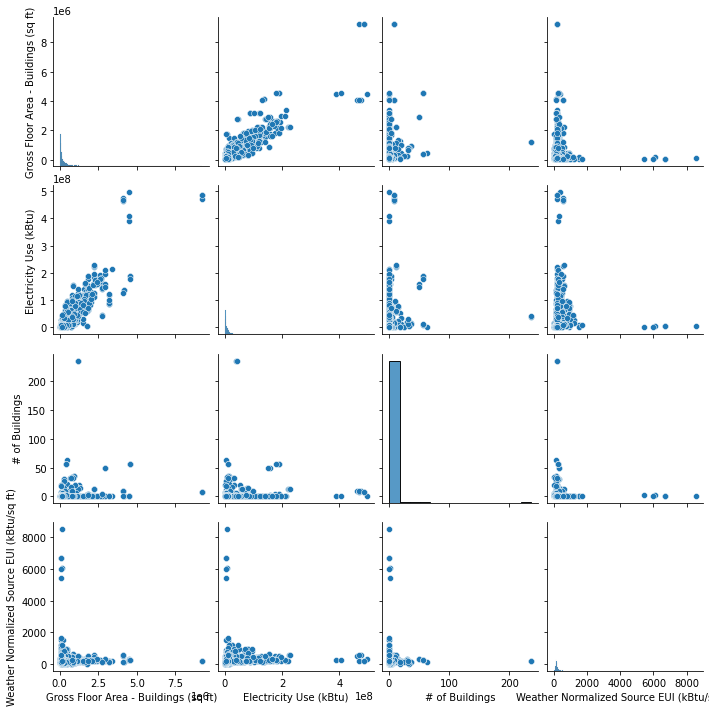

In [18]:
# Create a pair plot
sns.pairplot(df)
plt.show()

#### Heatmap

<Axes: >

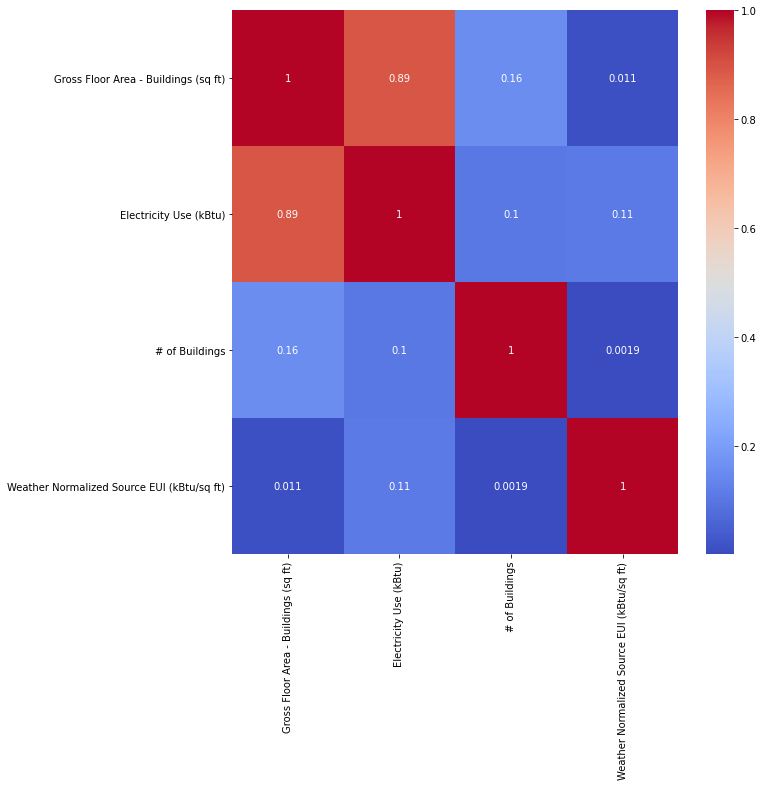

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

## Data pre-processing

For outlier removal, z-score capping is used

In [20]:
def outlier_detec(col):
    mean = np.mean(col)
    sd = np.std(col)
    upp_bd = mean + 3*sd
    low_bd = mean - 3*sd
    return upp_bd, low_bd

In [21]:
upp_lis = []
low_lis = []
col = ['Gross Floor Area - Buildings (sq ft)', 'Electricity Use (kBtu)', '# of Buildings', 'Weather Normalized Source EUI (kBtu/sq ft)']

for i in col:
    upp, low = outlier_detec(df[i])  # Pass df[i] instead of data[i]
    upp_lis.append(upp)
    low_lis.append(low)

d = {'Upper Bound': upp_lis, 'Lower Bound': low_lis}
outlier_df = pd.DataFrame(d, index=col)
outlier_df

,Upper Bound,Lower Bound
Gross Floor Area - Buildings (sq ft),1.799352e+06,-1.175543e+06
Electricity Use (kBtu),1.115630e+08,-8.130419e+07
# of Buildings,1.900747e+01,-1.600903e+01
Weather Normalized Source EUI (kBtu/sq ft),1.008518e+03,-6.032695e+02


#### Before outlier treatment

In [22]:
count_lis = []
for i in col:
    upp, low = outlier_df.loc[i]
    count = sum((df[i] > upp) | (df[i] < low))
    count_lis.append(count)

d = {'Outlier Count': count_lis}
outlier_count_df = pd.DataFrame(d, index=col)
outlier_count_df

,Outlier Count
Gross Floor Area - Buildings (sq ft),79
Electricity Use (kBtu),83
# of Buildings,26
Weather Normalized Source EUI (kBtu/sq ft),16


In [23]:
count_lis = []
for i in col:
    upp, low = outlier_detec(df[i])
    df[i] = np.where(df[i] > upp, upp, np.where(df[i] < low, low, df[i]))

#### After outlier treatment

In [24]:
count_lis = []
for i in col:
    upp, low = outlier_df.loc[i]
    count = sum((df[i] > upp) | (df[i] < low))
    count_lis.append(count)

d = {'Outlier Count': count_lis}
outlier_count_df1 = pd.DataFrame(d, index=col)
outlier_count_df1

,Outlier Count
Gross Floor Area - Buildings (sq ft),0
Electricity Use (kBtu),0
# of Buildings,0
Weather Normalized Source EUI (kBtu/sq ft),0


#### Standard scaling

In [25]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Gross Floor Area - Buildings (sq ft)', 'Electricity Use (kBtu)']
scaler = StandardScaler()

scaled_columns = scaler.fit_transform(df[columns_to_scale])
scaled_columns = np.round(scaled_columns, 2)
df[columns_to_scale] = scaled_columns

In [26]:
df.head()

,Gross Floor Area - Buildings (sq ft),Electricity Use (kBtu),# of Buildings,Weather Normalized Source EUI (kBtu/sq ft)
0,0.08,-0.31,1.0,122.0
1,0.44,1.00,1.0,261.0
2,4.24,4.44,8.0,200.0
3,-0.12,-0.35,1.0,135.0
4,0.09,-0.25,1.0,136.0


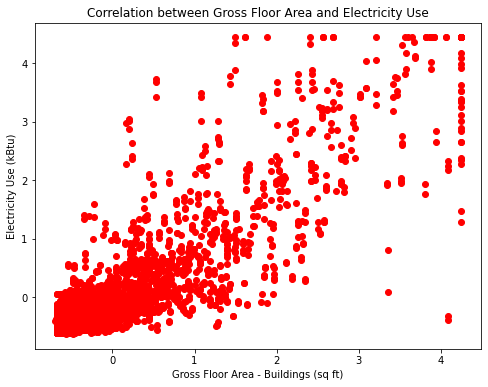

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Gross Floor Area - Buildings (sq ft)'], df['Electricity Use (kBtu)'], color='red')
plt.title("Correlation between Gross Floor Area and Electricity Use")
plt.xlabel("Gross Floor Area - Buildings (sq ft)")
plt.ylabel("Electricity Use (kBtu)")
plt.show()

### Train-test splitting

In [28]:
from sklearn.model_selection import train_test_split
X = df[['Gross Floor Area - Buildings (sq ft)', '# of Buildings', 'Weather Normalized Source EUI (kBtu/sq ft)']]
y = df['Electricity Use (kBtu)']

# shape of trainig and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building & Evaluation

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [31]:
linear_preds = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test,linear_preds)
linear_mse = mean_squared_error(y_test,linear_preds)
linear_r2 = r2_score(y_test,linear_preds)

print(linear_mae)
print(linear_mse)
print(linear_r2)

0.2278099262403703
0.16485096384692308
0.8471681647244298


In [32]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
decision_preds = tree_model.predict(X_test)
decision_mae = mean_absolute_error(y_test,decision_preds)
decision_mse = mean_squared_error(y_test,decision_preds)
decision_r2 = r2_score(y_test,decision_preds)

print(decision_mae)
print(decision_mse)
print(decision_r2)

0.11591369379412861
0.06078809476805402
0.9436439079911367


In [34]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test,rf_preds)
rf_mse = mean_squared_error(y_test,rf_preds)
rf_r2 = r2_score(y_test,rf_preds)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.1085955173054844
0.051172046339749123
0.9525588593817836


In [36]:
# SVM
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [37]:
svr_preds = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test,svr_preds)
svr_mse = mean_squared_error(y_test,svr_preds)
svr_r2 = r2_score(y_test,svr_preds)

print(svr_mae)
print(svr_mse)
print(svr_r2)

0.4405285317354824
0.9268924488367336
0.14068640696376744


In [38]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.01)

In [39]:
lasso_preds = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test,lasso_preds)
lasso_mse = mean_squared_error(y_test,lasso_preds)
lasso_r2 = r2_score(y_test,lasso_preds)

print(lasso_mae)
print(lasso_mse)
print(lasso_r2)

0.22670110636557897
0.16521344820243047
0.8468321087620132


In [40]:
# Ridge regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [41]:
rd_preds = ridge_model.predict(X_test)
rd_mae = mean_absolute_error(y_test,rd_preds)
rd_mse = mean_squared_error(y_test,rd_preds)
rd_r2 = r2_score(y_test,rd_preds)

print(rd_mae)
print(rd_mse)
print(rd_r2)

0.2278067339521543
0.1648511991828834
0.8471679465465928


### Validation

In [42]:
from sklearn.model_selection import cross_val_predict

In [43]:
target_variable = 'Electricity Use (kBtu)'
features = ['Gross Floor Area - Buildings (sq ft)', '# of Buildings', 'Weather Normalized Source EUI (kBtu/sq ft)']

In [44]:
predicted = cross_val_predict(rf_model, df[features], df[target_variable], cv=5)

In [45]:
mae = mean_absolute_error(df[target_variable], predicted)
mse = mean_squared_error(df[target_variable], predicted)
rmse = np.sqrt(mse)
r2 = r2_score(df[target_variable], predicted)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.09937181475078811
Mean Squared Error: 0.03671970124818841
Root Mean Squared Error: 0.19162385354696426
R-squared: 0.963261962496638
